In [1]:
from py_topping.data_preparation.lazy_ml import lazy_dnn

In [ ]:
lazy_dnn(train_in 
        , target_in
        , num_col_in = []
        , cat_col_in = [] 
        , node_in = [16,4]
        , val_in = None 
        , train_batch = 10 
        , val_batch = 10 
        , epochs = 10 
        , normalize = True
        , embedded_size = 16 
        , drop_out_ratio = 0.1
        , patience_in = 10
        , amplify_in = 1
        , optimize_in = 'adam'
        , loss_in = 'mse' 
        , debug = False) 

### List of Parameter
 - **train_in** : Training Dataset (Pandas DataFrame)
 - **target_in** : Name of Target Prediction (String)
 - **num_col_in** : List of Columns' name for numeric feature (List)
 - **cat_col_in**  : List of Columns' name for categorical feature (List)
 - **node_in** : List of Neural Network Node and Layer (List)
 - **val_in** : Validate Dataset (Pandas DataFrame)
 - **train_batch** : Number observations to training per batch (Integer)
 - **val_batch** : Number observations to validate per batch (Integer)
 - **epochs** : Number of Iteration during the training (Integer)
 - **normalize** : To normalize Numeric or not (Boolean)
 - **embedded_size** : Size of Embedded Layer for Categorical Columns (Integer)
 - **drop_out_ratio** : Percentage of Node that will Drop for Categorical's Embedded Layer (Float)
 - **patience_in** : Number of Iteration that model allow if the loss not improve (Integer)
 - **amplify_in** : Amplify during the Last DNN Layer (Float)
 - **optimize_in** : TF's Optimizer that will use during the Training (String)
 - **loss_in** : TF's Loss that will use during the Training (String)
 - **debug** : To show Model's Summary Structure & Learning Curve or not (Boolean)

**Return** : Tensorflow's Sequential Model

# Sample DataFrame

In [24]:
import pandas as pd
import numpy as np

train = pd.DataFrame({'num1' : range(0,100), 'num2' : np.random.rand(100), 'cat1' : np.random.randint(3 , size=100)})
train['num3'] = train['num1']*np.where(train['cat1'] == 1, 20, train['cat1'] + 2)
val = pd.DataFrame({'num1' : range(0,100), 'num2' : np.random.rand(100), 'cat1' : np.random.randint(3 , size=100)})
val['num3'] = val['num1']*np.where(val['cat1'] == 1, 20, val['cat1'] + 2)
test = pd.DataFrame({'num1' : range(0,20), 'num2' : np.random.rand(20), 'cat1' : np.random.randint(3 , size=20)})
test['num3'] = test['num1']*np.where(test['cat1'] == 1, 20, test['cat1'] + 2)
train.head(5)

,num1,num2,cat1,num3
0,0,0.608655,2,0
1,1,0.910253,0,2
2,2,0.277642,1,40
3,3,0.449658,0,6
4,4,0.317019,0,8


# Training Phase


1. Basic Train With 1 numeric Feature

In [25]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1']) 

Epoch 1/10


C:\Users\chanonkr\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:595: UserWarning: Input dict contained keys ['num2', 'cat1', 'num3'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


10/10 [==============================] - 0s 1ms/step - loss: 447555.0369
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 551230.1989
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 555699.6307
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 454076.8168
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 402927.7628
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 458882.7415
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 342204.4531
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 469735.6648
Epoch 9/10
10/10 [==============================] - 0s 997us/step - loss: 659096.1932
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 466459.0767


2. Basic Train With 1 numeric Feature and 1 categorical Feature

In [26]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1']
                , cat_col_in = ['cat1']) 

Epoch 1/10


C:\Users\chanonkr\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:595: UserWarning: Input dict contained keys ['num2', 'num3'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


10/10 [==============================] - 0s 1ms/step - loss: 514175.5568
Epoch 2/10
10/10 [==============================] - 0s 886us/step - loss: 594691.4375
Epoch 3/10
10/10 [==============================] - 0s 997us/step - loss: 422683.3878
Epoch 4/10
10/10 [==============================] - 0s 997us/step - loss: 407356.7557
Epoch 5/10
10/10 [==============================] - 0s 848us/step - loss: 524886.4574
Epoch 6/10
10/10 [==============================] - 0s 887us/step - loss: 351896.0447
Epoch 7/10
10/10 [==============================] - 0s 887us/step - loss: 369724.3970
Epoch 8/10
10/10 [==============================] - 0s 998us/step - loss: 559196.9261
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 605726.4886
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 452462.5653


3. Basic Train With 2 numeric Feature and 1 categorical Feature

In [27]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']) 

Epoch 1/10


C:\Users\chanonkr\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:595: UserWarning: Input dict contained keys ['num3'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


10/10 [==============================] - 1s 1ms/step - loss: 392294.9105
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 469208.7614
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 532843.1761
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 470622.0966
Epoch 5/10
10/10 [==============================] - 0s 997us/step - loss: 442711.5625
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 498885.1136
Epoch 7/10
10/10 [==============================] - 0s 997us/step - loss: 483865.0739
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 428738.5455
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 455557.1619
Epoch 10/10
10/10 [==============================] - 0s 994us/step - loss: 458217.5142


4. Show Model Summary and Curve

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
cat1_embedding (Embedding)      (None, 1, 16)        64          cat1[0][0]                       
__________________________________________________________________________________________________
num1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
num2 (InputLayer)               [(None, 1)]          0                                            
___________________________________________________________________________________________

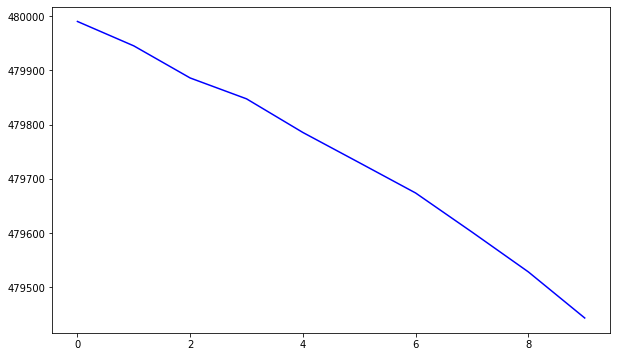

In [28]:
model = lazy_dnn(train_in = train
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']
                , debug = True) 

5. Training With Validate Data Set

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
cat1_embedding (Embedding)      (None, 1, 16)        64          cat1[0][0]                       
__________________________________________________________________________________________________
num1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
num2 (InputLayer)               [(None, 1)]          0                                            
___________________________________________________________________________________________

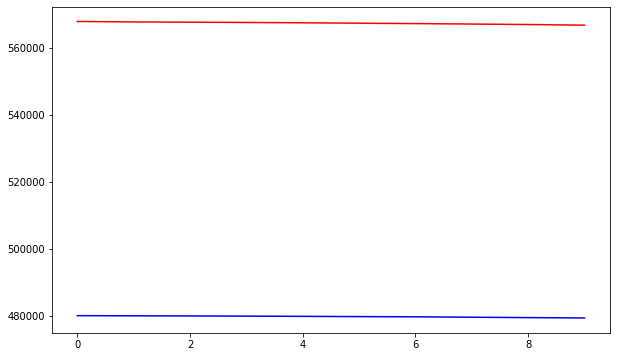

In [29]:
model = lazy_dnn(train_in = train , val_in = val
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']
                , debug = True) 

6. Modify Neural Network and Iteration

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
cat1_embedding (Embedding)      (None, 1, 16)        64          cat1[0][0]                       
__________________________________________________________________________________________________
num1 (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
num2 (InputLayer)               [(None, 1)]          0                                            
___________________________________________________________________________________________

10/10 [==============================] - 0s 5ms/step - loss: 50505.1193 - val_loss: 22902.6582
Epoch 45/100
10/10 [==============================] - 0s 5ms/step - loss: 29095.5716 - val_loss: 21955.1777
Epoch 46/100
10/10 [==============================] - 0s 5ms/step - loss: 26762.5692 - val_loss: 21490.4297
Epoch 47/100
10/10 [==============================] - 0s 5ms/step - loss: 23715.0568 - val_loss: 19844.9844
Epoch 48/100
10/10 [==============================] - 0s 5ms/step - loss: 35269.6951 - val_loss: 19207.3516
Epoch 49/100
10/10 [==============================] - 0s 5ms/step - loss: 26064.2560 - val_loss: 17883.2695
Epoch 50/100
10/10 [==============================] - 0s 5ms/step - loss: 33999.2276 - val_loss: 17819.3301
Epoch 51/100
10/10 [==============================] - 0s 5ms/step - loss: 28035.1664 - val_loss: 16700.2793
Epoch 52/100
10/10 [==============================] - 0s 5ms/step - loss: 32907.7031 - val_loss: 16456.6445
Epoch 53/100
10/10 [=====================

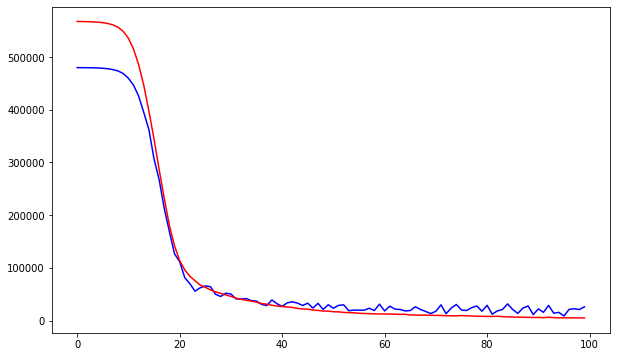

In [30]:
model = lazy_dnn(train_in = train , val_in = val
                , target_in = 'num3'
                , num_col_in = ['num1','num2']
                , cat_col_in = ['cat1']
                , node_in = [64,32,16]
                , train_batch = 10 , val_batch = 10 
                , epochs = 100
                , normalize = True , embedded_size = 16, drop_out_ratio = 0.1
                , patience_in = 5 , debug = True) 

# Prediction Phase

In [31]:
model.predict(dict(test)).flatten()

array([ 27.41837 , 245.93813 ,  30.136715,  27.41837 , 191.1573  ,
        32.708195, 227.5765  ,  40.606327,  27.41837 ,  25.428314,
       231.5366  ,  27.41837 , 426.24857 ,  27.027195,  33.830494,
        35.71207 ,  37.079174,  37.58278 ,  27.315403,  43.27341 ],
      dtype=float32)

<AxesSubplot:>

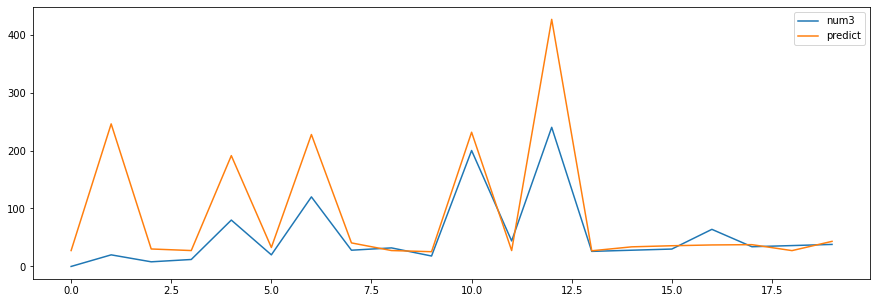

In [32]:
test['predict'] = model.predict(dict(test)).flatten()
test[['num3','predict']].plot(figsize = (15,5))